# Feature Engineering and Machine Learning

In [1]:
# Import modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from sklearn import tree
from sklearn.model_selection import GridSearchCV

# Figures inline and set visualizations style
%matplotlib inline
sns.set()

# import data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/predict_test.csv')

# store target variable of training data in a save place
survived_train = df_train.Survived

# Concatenate training and test sets
data = pd.concat([df_train.drop(['Survived'], axis = 1), df_test])

# View head
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


###### We will do some Feature engineering to extract more information from our data

In [3]:
# View head of name column
data.Name.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

###### Notice that this columns contains strings that have 'Title' such as 'Mr', 'Master', 'Dona'. 

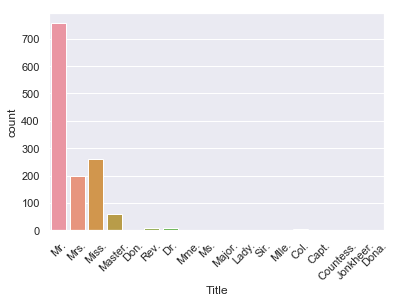

In [4]:
# Extract Title from Name, store in column and plat barplot
data['Title'] = data.Name.apply(lambda x: re.search('([A-Z][a-z]+)\.', x).group())
sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);


###### There are several titles and it makes sense to put them in fewer buckets

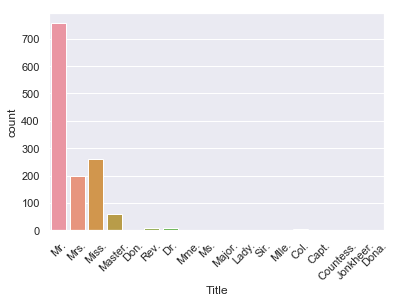

In [5]:
data['Title'] = data['Title'].replace({'Mlle','Miss', 'Mme','Mrs', 'Ms','Miss'})
data['Title'] = data['Title'].replace(['Don', 'Dona', 'Rev', 'Dr', 'Major', 'Lady', 'Sir', 'Col',
                                      'Capt', 'Countess', 'Jonkheer'], 'Special')

sns.countplot(x='Title', data=data);
plt.xticks(rotation=45);

In [6]:
data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr.
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona.
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr.
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr.
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master.


###### Create a new cabin column in order to fill in the Nan values due tothis information might be important about Survival or not

In [7]:
# Did they have a cabin? 
data['Has_Cabin'] = ~data.Cabin.isnull()

data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Has_Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,False


In [8]:
# Drop columns and view head ['Cabin', 'Name', 'PassengerId', 'Ticket']

data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr.,False
1,1,female,38.0,1,0,71.2833,C,Mrs.,True
2,3,female,26.0,0,0,7.9250,S,Miss.,False
3,1,female,35.0,1,0,53.1000,S,Mrs.,True
4,3,male,35.0,0,0,8.0500,S,Mr.,False


### Dealing with missing values

In [9]:
# impute missing values for Age, Fare, Embarked 

data['Age'] = data.Age.fillna(data.Age.median())
data['Fare'] = data.Fare.fillna(data.Fare.median())
data['Embarked'] = data['Embarked'].fillna('S')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Pclass       1309 non-null int64
Sex          1309 non-null object
Age          1309 non-null float64
SibSp        1309 non-null int64
Parch        1309 non-null int64
Fare         1309 non-null float64
Embarked     1309 non-null object
Title        1309 non-null object
Has_Cabin    1309 non-null bool
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 133.3+ KB


In [10]:
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin
0,3,male,22.0,1,0,7.2500,S,Mr.,False
1,1,female,38.0,1,0,71.2833,C,Mrs.,True
2,3,female,26.0,0,0,7.9250,S,Miss.,False
3,1,female,35.0,1,0,53.1000,S,Mrs.,True
4,3,male,35.0,0,0,8.0500,S,Mr.,False


## Bin the numerical Data

###### Using pandas and the function qcut to bin the numerical data

In [11]:
# Binning numerical columns
data['CatAge'] = pd.qcut(data.Age, q=4)
data['CatFare'] = pd.qcut(data.Fare, q=4)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,Mr.,False,"(0.169, 22.0]","(-0.001, 7.896]"
1,1,female,38.0,1,0,71.2833,C,Mrs.,True,"(35.0, 80.0]","(31.275, 512.329]"
2,3,female,26.0,0,0,7.9250,S,Miss.,False,"(22.0, 28.0]","(7.896, 14.454]"
3,1,female,35.0,1,0,53.1000,S,Mrs.,True,"(28.0, 35.0]","(31.275, 512.329]"
4,3,male,35.0,0,0,8.0500,S,Mr.,False,"(28.0, 35.0]","(7.896, 14.454]"


In [12]:
data['CatAge'] = pd.qcut(data.Age, q=4, labels=False)
data['CatFare'] = pd.qcut(data.Fare, q=4, labels=False)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,22.0,1,0,7.2500,S,Mr.,False,0,0
1,1,female,38.0,1,0,71.2833,C,Mrs.,True,3,3
2,3,female,26.0,0,0,7.9250,S,Miss.,False,1,1
3,1,female,35.0,1,0,53.1000,S,Mrs.,True,2,3
4,3,male,35.0,0,0,8.0500,S,Mr.,False,2,1


######  we can drop safely 'Age' and 'Fare' columns

In [13]:
data = data.drop(['Age', 'Fare'], axis=1)
data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,1,0,S,Mr.,False,0,0
1,1,female,1,0,C,Mrs.,True,3,3
2,3,female,0,0,S,Miss.,False,1,1
3,1,female,1,0,S,Mrs.,True,2,3
4,3,male,0,0,S,Mr.,False,2,1


###### Create a new column, number of members in family onboard

In [ ]:
# To complete later
data['Fam_Size']=____

In [15]:
# drop columns 

data = data.drop(['SibSp', 'Parch'], axis=1)
data.head()

,Pclass,Sex,Embarked,Title,Has_Cabin,CatAge,CatFare
0,3,male,S,Mr.,False,0,0
1,1,female,C,Mrs.,True,3,3
2,3,female,S,Miss.,False,1,1
3,1,female,S,Mrs.,True,2,3
4,3,male,S,Mr.,False,2,1


#### Transform all into a numerical numbers using get_dummies

In [16]:
# Transform into a binary variables
data_dum = pd.get_dummies(data, drop_first=True)
data_dum.head()

,Pclass,Has_Cabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Col.,Title_Countess.,Title_Don.,...,Title_Major.,Title_Master.,Title_Miss.,Title_Mlle.,Title_Mme.,Title_Mr.,Title_Mrs.,Title_Ms.,Title_Rev.,Title_Sir.
0,3,False,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,True,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,False,1,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,True,2,3,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,3,False,2,1,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Building the model with the new dataset!

In [17]:
# Split into test and train data
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

# Transform into arrays for scikit-learn
X = data_train.values
test = data_test.values
y = survived_train.values


In [18]:
# Setup the hyperparameter grid
dep = np.arange(1, 9)
param_grid = {'max_depth' : dep}

# Instantiate a decision tree classifier: clf  
clf = tree.DecisionTreeClassifier()

# Instantiate the GridSearchCV object: clf_cv
clf_cv = GridSearchCV(clf, param_grid=param_grid, cv=5)

# Fit it to the data
clf_cv.fit(X, y)

# print the tuned parameter and score
print('Tuned Decision Tree Parameters: {}'.format(clf_cv.best_params_))
print('Best score is {}'.format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': 6}
Best score is 0.8035914702581369


###### prediction for Kaggle

In [19]:
Y_pred = clf_cv.predict(test)
df_test['Survived'] = Y_pred
df_test[['PassengerId', 'Survived']].to_csv('data/predictions/dec_tree_feat_eng.csv', index=False)